# Flight Fare Prediction ( Regression Problem )

### Steps :                                                                         

1. Importing the Libraries                                      
2. Importing Dataset                                       
3. Training Data Preprocessing                                   
4. Exploratory Data Analysis (EDA)                            
5. Handling Categorical Data                                   
6. Testing Data Preprocessing                                   
7. Feature Selection                                           
8. Model Creation and Evalution                                    
9. Front-End Creation                                       
10. Deployment                                                

## Importing Required Libraries

1. Numpy : For calculations and numerical process                  
2. Pandas : Data Analysis and Manipulation                         
3. Matplotlib : Data Visualisation                            
4. Seaborn : Data Visualisation                                    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing Dataset

1. Here, the Data is stored in the file with .xlsx extension, So we have to use read_excel() function to import data.                
2. Now, we explore the Dataset and then hunt for missing values and handle them.                                                      
3. If null values are present, then we impute the missing values with either mean, median or mode.                             
4. For Statistical analysis, we use the describe() method.

In [2]:
# Importing the dataset
df = pd.read_excel(r'flight_train_set.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Training Data Preprocessing

In [4]:
# Checking the size of the dataset
print("Number of rows in the dataset",df.shape[0])
print("Number of columns in the dataset",df.shape[1])

Number of rows in the dataset 10683
Number of columns in the dataset 11


In [5]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Checking for the missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Handling the missing values
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Statistical Analysis
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Exploratory Data Analysis

1. From above description, we get to know that "Date_of_Journey", "Duration", "Dep_time" and "Arrival_time" are of "object" type. So, we have to convert them into datetime object for using them for prediction of the fare price.                                                         
2. For converting, we use pd.to_datetime() function of the pandas.    

### Converting Date_of_journey

In [9]:
# Changing Data type of "Date_of_Journey" columns into datetime
df["Date_of_Journey"] = pd.to_datetime(df['Date_of_Journey'],infer_datetime_format=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
# Adding New columns(Journey_day,Journey_month,Journey_year)
# Extracting day from "Date_of_Journey"
df['Journey_day'] = df['Date_of_Journey'].dt.day

# Extracting month from "Date_of_Journey"
df['Journey_month'] = df['Date_of_Journey'].dt.month

# Extracting year from "Date_of_Journey"
#df['Journey_year'] = df['Date_of_Journey'].dt.year

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Droping the "Date_of_Journey" column because it is of no use
df.drop(['Date_of_Journey'],axis = 1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## Converting Arrival_Time to Dep_Time

In [12]:
# Changing data type of "Arrival_Time" column into datatime
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-10-30 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-10-30 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-10-30 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [13]:
# Adding new columns (Arrival_hour, Arrival_min)

# Extracting Arrival_hour
df['Arrival_hour'] = df['Arrival_Time'].dt.hour

# Extracting Arrival_min
df['Arrival_min'] = df['Arrival_Time'].dt.minute

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-10-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-10-30 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-10-30 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [14]:
# Droping Arrival_time column because it is of no use
df.drop(['Arrival_Time'],axis = 1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [15]:
# Changing Data type of "Dep_Time" column into datetime
df['Dep_Time'] = pd.to_datetime(df.Dep_Time)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-30 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-30 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-30 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-30 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-30 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [16]:
# Adding new columns (Dep_hour, Dep_min)

# Extracting Departure Hour
df['Dep_hour'] = df['Dep_Time'].dt.hour

# Extracting Departure min
df['Dep_min'] = df['Dep_Time'].dt.minute

df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-30 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-30 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-30 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-30 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-30 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [17]:
# Droping "Dep_Time" column because it is of no use
df.drop(['Dep_Time'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


## Converting Duration

In [18]:
# Converting Duration into Duration in minutes
duration =  list(df['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        
df["Duration_min"] =  minutes
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,285


In [19]:
# Droping Duration column because it is of no use
df.drop(['Duration'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285


# Handle Categorical Variable

1. Label Encoder -> We use these when we have Ordinal Data in our Dataset.
2. OneHot Encoder -> We use these when we have Nominal Data in our Dataset.

In [20]:
# Checking Distribution of Source column
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

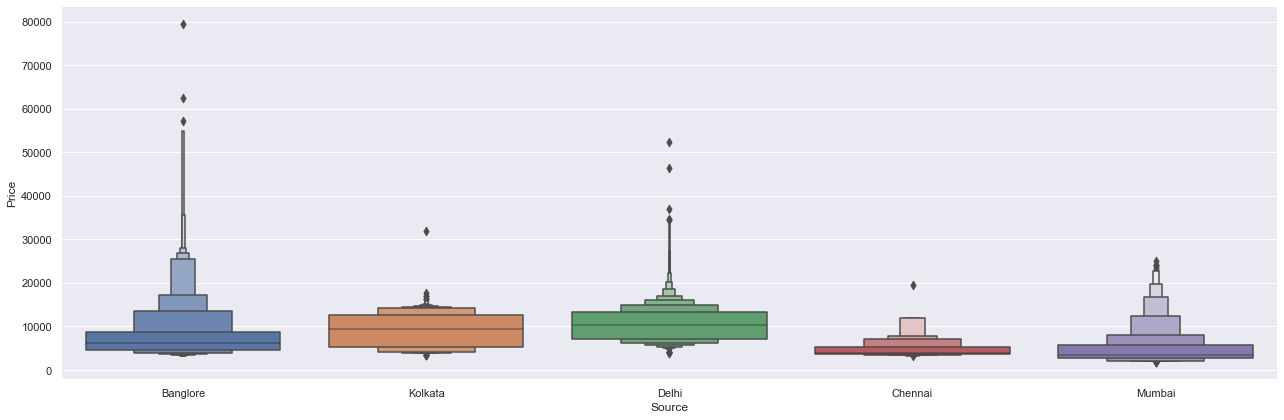

In [21]:
# Visualizing the source vs price
sns.catplot(x = "Source",y = "Price", data = df, kind = 'boxen', aspect = 3, height = 6)

In [22]:

# Extracting source column from dataframe and encode it into OneHotEncoding
source = df['Source']
source = pd.get_dummies(source, drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
# Checking Distribution of Destination column
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

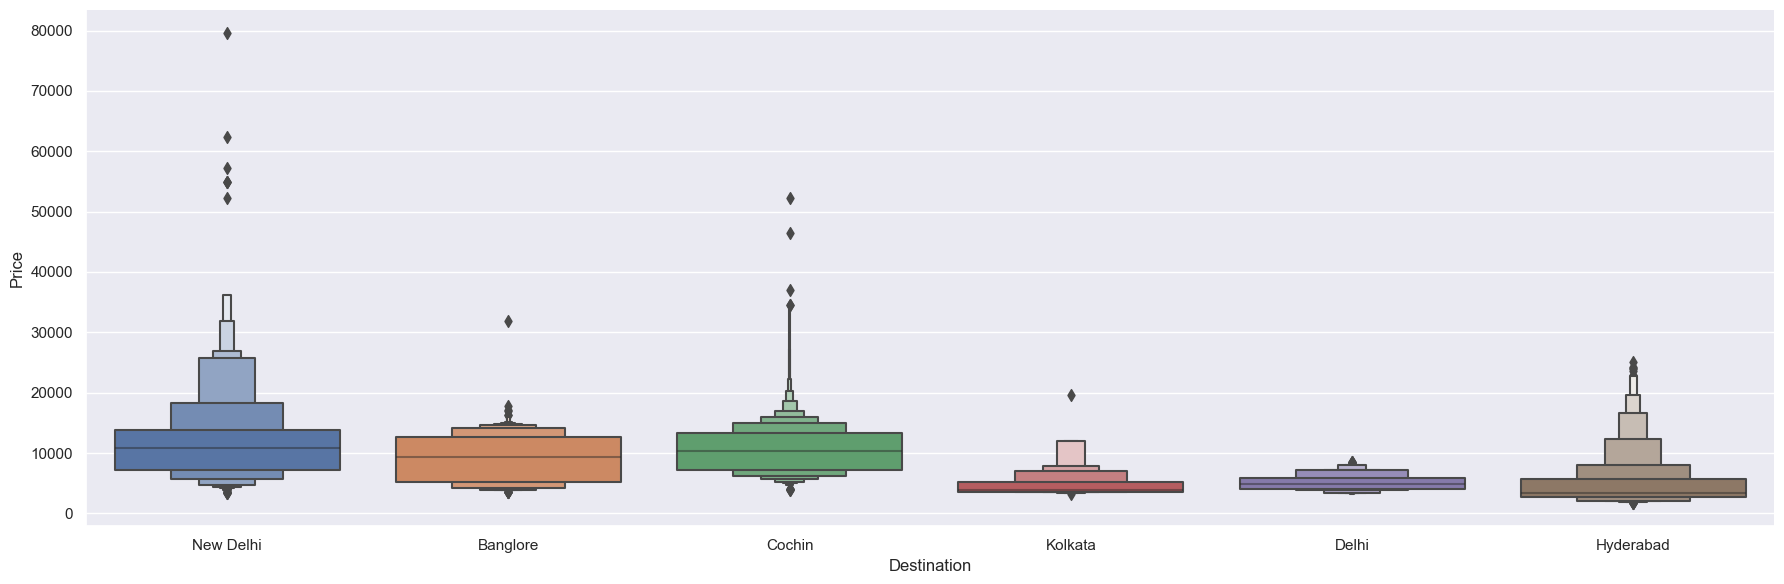

In [24]:
# Visualizing the destination vs price
sns.catplot(x = "Destination", y = 'Price',data=df, kind = 'boxen', aspect = 3, height = 6)

In [25]:
# Extracting Destination column from DataFrame and encode it into OneHotEncoding
destination = df['Destination']
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
# Checking Distribution of Airline column
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

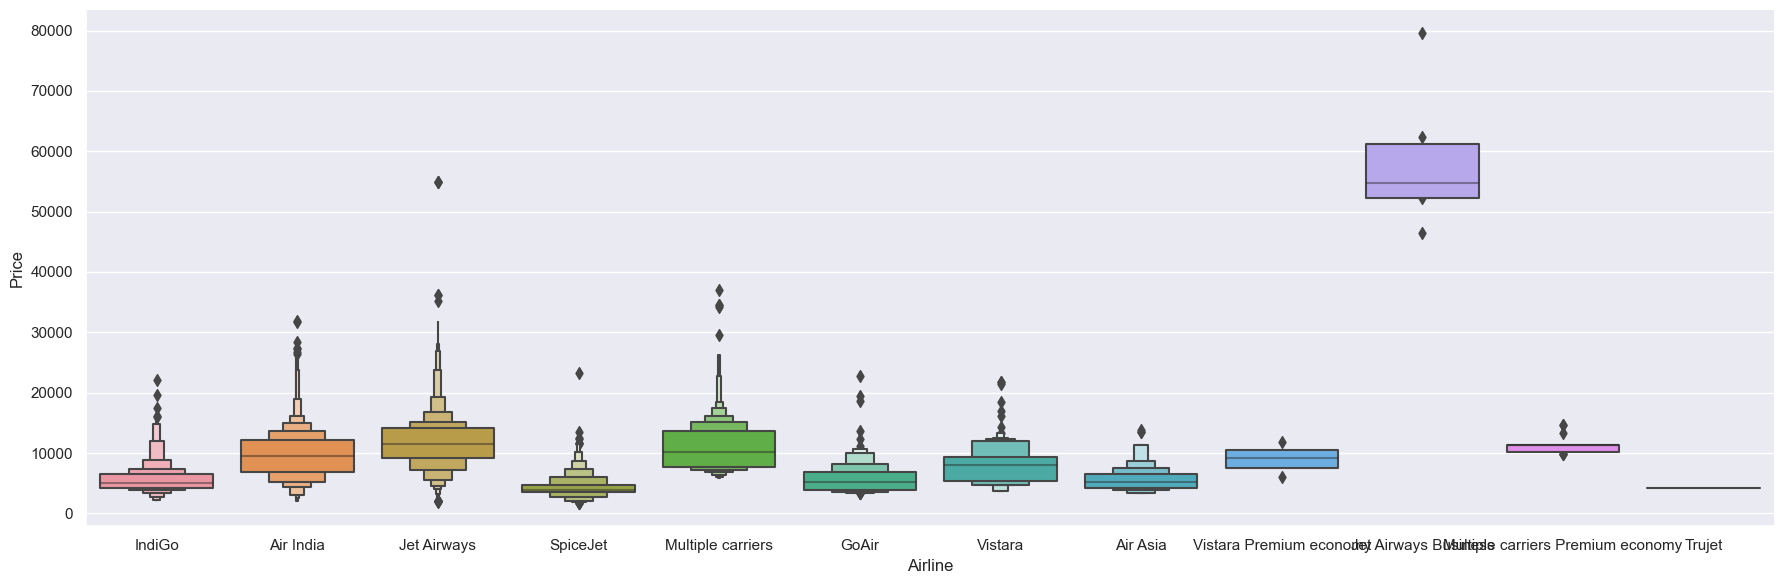

In [27]:
# Visualizing the airline vs price
sns.catplot(x = "Airline", y = "Price", data = df, kind = 'boxen', aspect = 3, height = 6)

In [28]:
# Extracting Airline column from DataFrame and encode it into OneHotEncoding
airlines = df['Airline']
airlines = pd.get_dummies(airlines, drop_first=True)
airlines["Trujet"] = 0
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
# Checking Relation Between route and total_stops
df[["Route","Total_Stops"]].head()

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop


In [30]:
df.drop(['Route'],axis = 1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,285


In [31]:
df['Total_Stops'].value_counts().to_dict()

{'1 stop': 5625,
 'non-stop': 3491,
 '2 stops': 1520,
 '3 stops': 45,
 '4 stops': 1}

In [32]:
## Replacing string values with the integer for calculation
stops = {'Total_Stops':{'non-stop': 0,
 '1 stop': 1,
 '2 stops': 2,
 '3 stops': 3,
 '4 stops': 4}}
df.replace(stops,inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,285


In [33]:
df['Additional_Info'].value_counts(normalize=True)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

#### Here, we can see that approximately 80% of the rows in the "Additional_Info" column is filled with "no_info" which is dominating and can leads to bad predictions. So, we have to drop this column.

In [34]:
# Droping Additional_Info column
df.drop(['Additional_Info'],axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [35]:
processed_data = pd.concat([df,source,destination,airlines],axis=1)
processed_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,1,0,0,0,0,0,0,0,0


In [36]:
processed_data.drop(['Airline','Source','Destination'],axis = 1, inplace=True)
processed_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,10,22,20,170,0,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,13,15,5,50,445,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,1140,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,23,30,18,5,325,0,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,285,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
processed_data.shape

(10682, 29)

#### Now our processed_data contains 10682 rows and 29 columns.




## Test Data Preprocessing

In [38]:
#Importing Test Data
test_data = pd.read_excel(r'flight_Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
#checking the size of test dataset
print("No of Rows in the test dataset",test_data.shape[0])
print("No of Rows in the test dataset",test_data.shape[1])

No of Rows in the test dataset 2671
No of Rows in the test dataset 10


In [40]:
# Checking for the null values
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [41]:
#Changing "Date_of_Journey" into Datetime
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data.head()

C:\python37\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\python37\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\python37\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\python37\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
# Changing "Date_of_Journey" into new columns Journey_year, Journey_month, Journey_day

# Extracting 'Journey_month'
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

# Extracting 'Journey_day'
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [43]:
# Droping 'Date_of_Journey' column because it is of no use
test_data.drop(['Date_of_Journey'],axis = 1,inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [44]:
# Changing "Arrival_Time" into datetime 
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2022-10-30 10:20:00,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2022-10-30 21:00:00,13h,1 stop,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2022-06-25 02:45:00,2h 50m,non-stop,No info,6,24


In [45]:
# Extracting "Arrival_hour","Arrival_min" from "Arrival_Time"
# Extracting "Arrival_hour"
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour

# Extracting "Arrival_min"
test_data['Arrival_min'] = test_data['Arrival_Time'].dt.minute

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2022-10-30 10:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2022-10-30 21:00:00,13h,1 stop,No info,5,21,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2022-06-25 02:45:00,2h 50m,non-stop,No info,6,24,2,45


In [46]:
# Droping "Arrival_Time" because it is of no use
test_data.drop(['Arrival_Time'],axis = 1, inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,5,21,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,5,21,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,6,24,2,45


In [47]:
#Changing "Dep_Time" into Datetime
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-10-30 17:30:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2022-10-30 06:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-10-30 19:15:00,23h 45m,1 stop,In-flight meal not included,5,21,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-10-30 08:00:00,13h,1 stop,No info,5,21,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2022-10-30 23:55:00,2h 50m,non-stop,No info,6,24,2,45


In [48]:
# Extracting Hour and minute form "Dep_Time"
# Extracting Dep_hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour

# Extracting Dep_minute 
test_data['Dep_min'] = test_data['Dep_Time'].dt.minute

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-10-30 17:30:00,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2022-10-30 06:20:00,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-10-30 19:15:00,23h 45m,1 stop,In-flight meal not included,5,21,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-10-30 08:00:00,13h,1 stop,No info,5,21,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2022-10-30 23:55:00,2h 50m,non-stop,No info,6,24,2,45,23,55


In [49]:
# Droping Dep_Time because it is of no use
test_data.drop(['Dep_Time'],axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,2,45,23,55


In [50]:
#Converting Duration into Duration in minutes
duration =  list(test_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))

test_data["Duration_min"] =  minutes
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,2,45,23,55,170


In [51]:
test_data.drop(['Duration'],axis = 1, inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,2,45,23,55,170


### The columns, 'Route' and 'Total_Stops' are correlated. In regression problem, we have to remove the correlated features. Thus we drop route coulumn.

In [52]:
test_data.drop(['Route'],axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,5,21,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,5,21,21,0,8,0,780
4,Air Asia,Banglore,Delhi,non-stop,No info,6,24,2,45,23,55,170


In [53]:
# printing the Total_Stops into dict
test_data['Total_Stops'].value_counts().to_dict()

{'1 stop': 1431, 'non-stop': 849, '2 stops': 379, '3 stops': 11, '4 stops': 1}

In [54]:
# Giving the values to the categorical variable
stops = {'Total_Stops':{'1 stop': 1, 'non-stop': 0, '2 stops': 2, '3 stops': 3, '4 stops': 4}}
test_data.replace(stops, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,5,21,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,5,21,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,6,24,2,45,23,55,170


In [55]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [56]:
#### More then 80% data have No info so we have to remove the column for get best score
test_data.drop(['Additional_Info'],axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,5,21,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,5,21,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,6,24,2,45,23,55,170


In [57]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [58]:
# Now we get dummie values of Airline
airlines = test_data['Airline']
airlines = pd.get_dummies(airlines,drop_first=True)
airlines["Trujet"] = 0
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [60]:
# Now we get dummie value of Source
sources = test_data['Source']
sources = pd.get_dummies(sources,drop_first=True)
sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [61]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [62]:
# Now we get dummie values of Destination
destinations = test_data['Destination']
destinations = pd.get_dummies(destinations, drop_first=True)
destinations.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [63]:
processed_test = pd.concat([test_data, airlines, sources, destinations],axis = 1)
processed_test.head()

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Trujet,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,5,21,19,0,19,15,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,5,21,21,0,8,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,6,24,2,45,23,55,...,0,0,0,0,0,0,1,0,0,0


In [64]:
processed_test.drop(['Airline','Source','Destination'],axis = 1, inplace = True)
processed_test.head()

,Total_Stops,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Air India,GoAir,...,Trujet,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,0,19,15,1425,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,21,0,8,0,780,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,2,45,23,55,170,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
processed_test.shape

(2671, 28)

## Feature Selection

Here, we find out the best features for training the model and also see at what extent they contribute to our fare prediction. We do these by

1. Heatmap                                                           
2. feature_importances_                                                  

In [66]:
# Checking the number of rows and columns
processed_data.shape

(10682, 29)

In [67]:
# Checking for column name
processed_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [68]:
processed_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,10,22,20,170,0,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,13,15,5,50,445,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,1140,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,23,30,18,5,325,0,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,285,0,...,0,1,0,0,0,0,0,0,0,0


In [69]:
# Extracting X = Independent/Predictor variable and Y = Dependent variable
X = processed_data.drop('Price',axis = 1).values
y = processed_data['Price'].values

print("X = ",X)
print()
print("y = ",y)

X =  [[ 0 24  3 ...  0  0  0]
 [ 2  1  5 ...  0  0  0]
 [ 2  9  6 ...  0  0  0]
 ...
 [ 0 27  4 ...  0  0  0]
 [ 0  1  3 ...  0  1  0]
 [ 2  9  5 ...  0  0  0]]

y =  [ 3897  7662 13882 ...  7229 12648 11753]


In [70]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


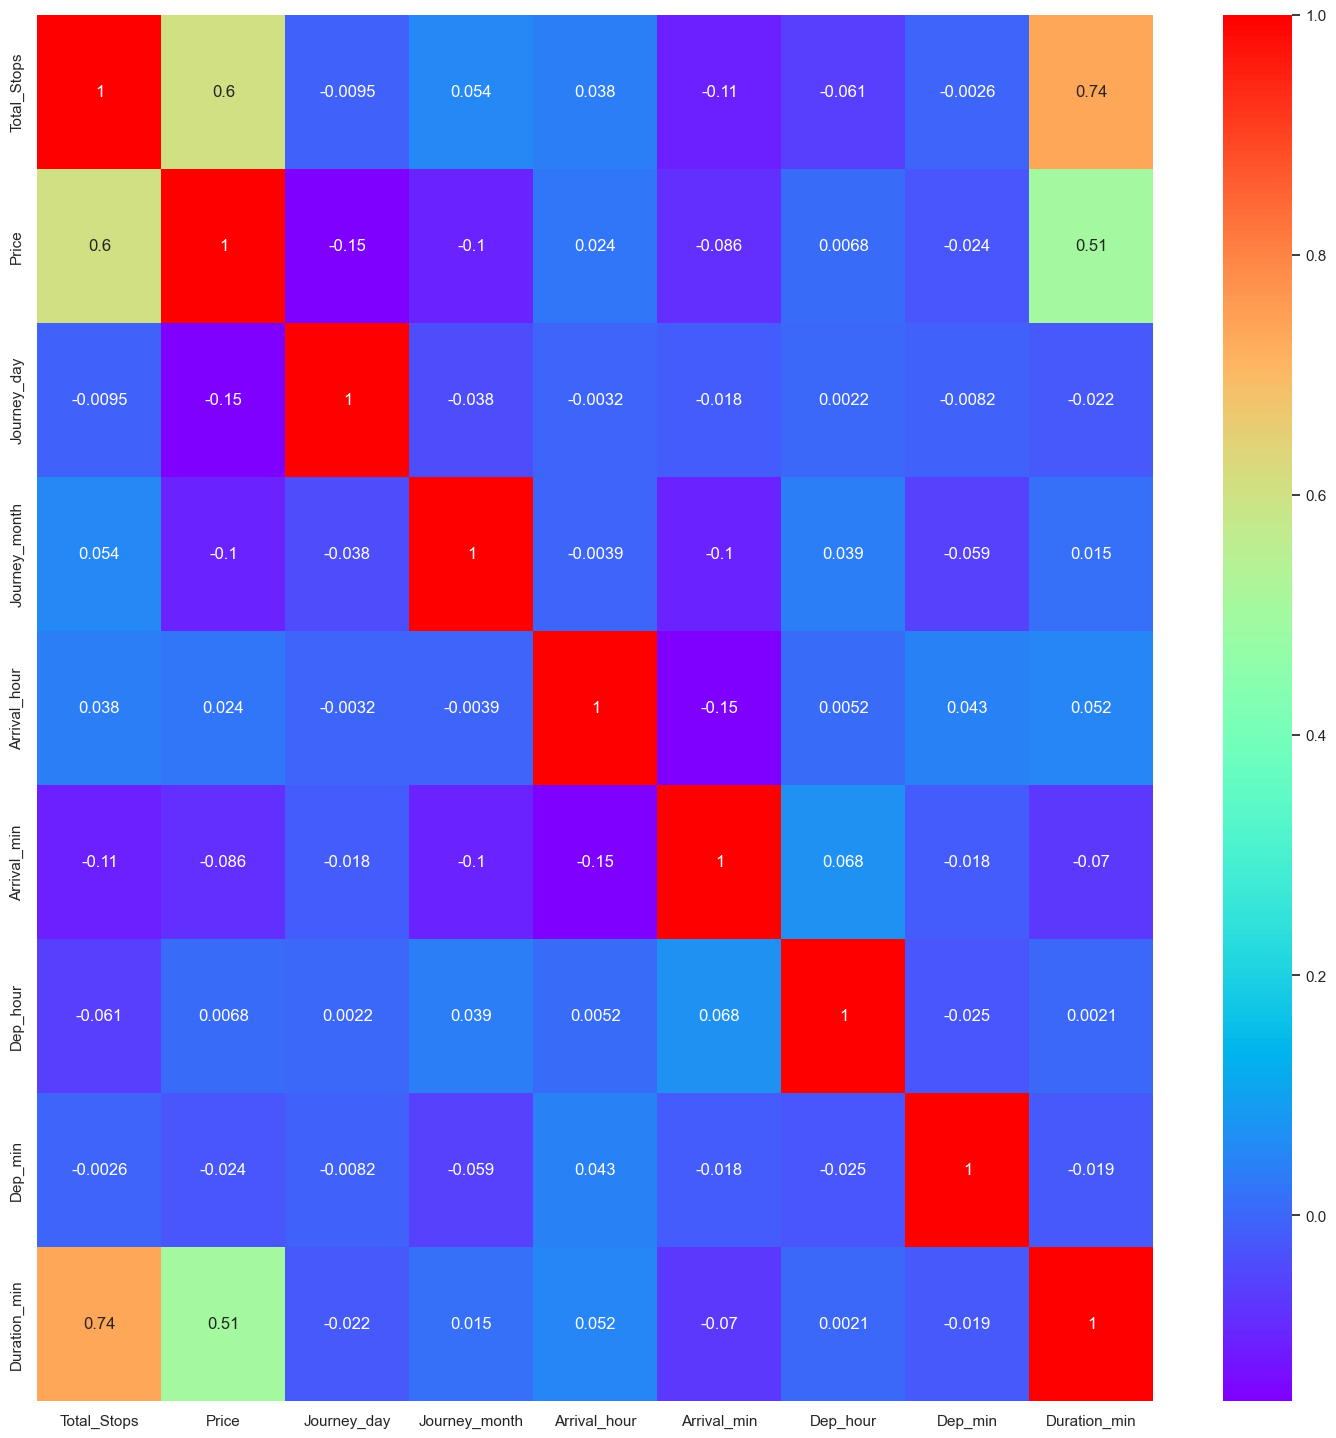

In [71]:
# Creating Heatmap to analyze relation between features
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot = True, cmap='rainbow')
plt.show()

In [72]:
# Extracting Important important using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
imp_features = ExtraTreesRegressor()
imp_features.fit(X,y)

ExtraTreesRegressor()

In [73]:
# Displaying important features proportions
print(imp_features.feature_importances_)

[2.30419714e-01 1.43415363e-01 5.39339351e-02 3.05479279e-02
 2.27464515e-02 2.61378171e-02 2.50400083e-02 1.25906098e-01
 4.31228645e-04 1.22511168e-02 3.27264892e-03 6.48370905e-03
 1.03403677e-02 1.50795772e-02 6.55288460e-03 4.22473175e-04
 2.49457607e-02 9.07548256e-03 1.71258763e-03 1.62104773e-02
 1.39114008e-01 6.70448670e-02 2.04635540e-02 8.82868174e-04
 2.35460733e-03 0.00000000e+00 5.14244836e-03 7.20179649e-05]


<AxesSubplot:>

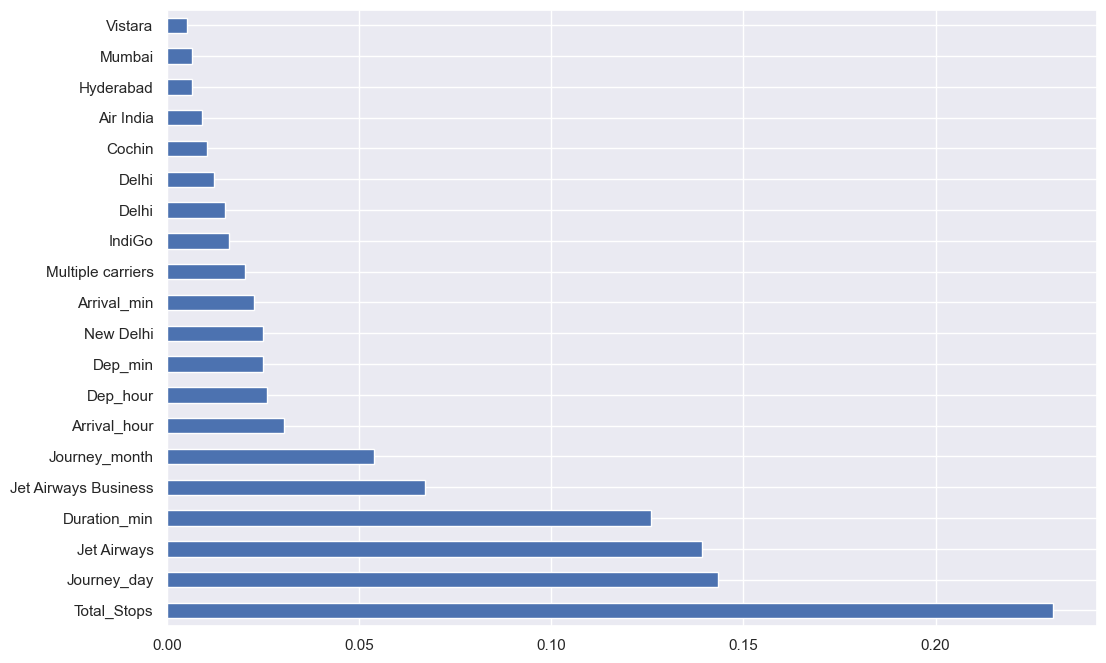

In [74]:
# Visualizing the feature_importance_
plt.figure(figsize=(12,8))
columns = processed_data.drop("Price",axis=1).columns
fseries = pd.Series(imp_features.feature_importances_,index=columns)
fseries.nlargest(20).plot(kind = 'barh')

## Fitting the model using

1. Split data into train and test so as to predict w.r.t. 'X_test'.
2. Import the model(which suits the data most or gives better results)
3. Fit training data into it
4. Predict w.r.t. 'X_test' (compare with 'Y_test')
5. In regression models check RMSE score
6. Plot final graphs

In [75]:
# Splitting the processed_data into train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)
print("Training set \nX= ",X_train.shape, "\ny= ",y_train.shape)
print("\nTesting set \nX= ",X_test.shape, "\ny= ",y_test.shape)

Training set 
X=  (7477, 28) 
y=  (7477,)

Testing set 
X=  (3205, 28) 
y=  (3205,)


In [76]:
# importing the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### The simple linear regression model is essentially a linear equation of the form y = c + b*x; where y is the dependent variable (outcome), x is the independent variable (predictor), b is the slope of the line; also known as regression coefficient and c is the intercept

In [77]:
# Creating and fitting the model
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
#Finding the cofficient and intercept for plotting the regression line
coefficients = pd.Series(reg_model.coef_,index = columns)
intercept = reg_model.intercept_

print("Intercept-->",intercept)
print("\ncoefficients-->",coefficients)

Intercept--> 7373.813999037413

coefficients--> Total_Stops                           2725.887770
Journey_day                            -74.370027
Journey_month                         -410.107235
Arrival_hour                            -9.664400
Arrival_min                              0.789660
Dep_hour                                19.481357
Dep_min                                 -2.539209
Duration_min                             0.030292
Chennai                                -27.003544
Delhi                                   20.793240
Kolkata                                 -7.386115
Mumbai                                -897.399411
Cochin                                  20.793240
Delhi                                 -914.747361
Hyderabad                             -897.399411
Kolkata                                -27.003544
New Delhi                             1825.743191
Air India                             1610.166773
GoAir                                   49.424131
In

In [78]:
# Predicting the value of the target variable for test set
y_pred = reg_model.predict(X_test)
print("Predicted value of the X_test set\n",y_pred[:100])

Predicted value of the X_test set
 [11344.93579095  6732.35792002  2579.77955341 14531.08609285
  5583.00733896 11822.74697651 11516.01116775  9697.39984574
  7685.79150597 14155.76032192  9535.64389625 11767.11353818
  6395.7737246  10704.86949215 11648.77138696  5957.9122234
 10226.29760614 10194.42465526  4592.3130706  10115.86970137
 14399.64870674  7166.52308916  7281.47561495 11553.35821633
 13928.33205672  5038.5332326   9338.52275896 14265.32000869
  5876.03052264 10416.35867033  8933.47562663  4904.42495223
  4965.75714156  6727.40957728 10931.51383629  6607.96159876
 12992.96840254  8207.87016969 10507.52784724  4046.42151997
 11815.33531846 13937.93037655 11143.7393799  12175.28143678
  3509.27487356  6912.83349699 10885.50796324  5707.04046957
  8850.33388943  9976.80017841  3848.52685488  4192.45868976
 10319.33113201  6047.86722182  3513.67138941 14843.53097766
 11101.73153639  8568.79001412  6706.32622443  6345.49608405
 11654.86129198 11320.1166263  13122.74206849  3213

In [79]:
#Checking coefficient of determination for training set
reg_model.score(X_train,y_train)

0.6382120634106978

In [80]:
#Checking coefficient of determination for training set
reg_model.score(X_test,y_test)

0.5871953545466406

Text(0, 0.5, 'Count')

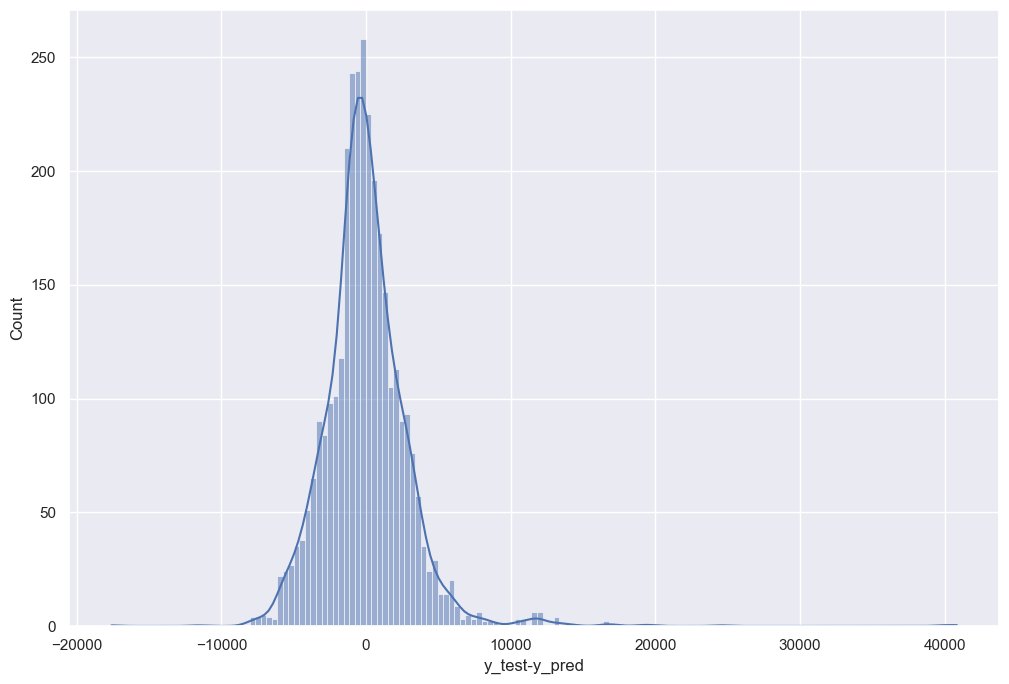

In [81]:
# Visualizing the distribution of difference in the actual value
plt.figure(figsize=(12,8))
sns.histplot(y_test-y_pred,kde = True)
plt.xlabel("y_test-y_pred")
plt.ylabel("Count")

In [82]:
# Importing and evaluating the prediction using metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",np.sqrt(mse))
print("R2 score",r2score)

Mean Absolute Error: 2021.7652256994847
Mean Squared Error 8912438.252789536
Root Mean Squared Error 2985.3707060915463
R2 score 0.5871953545466406


## Creating model using random forest regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50)
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
print("Predicted values of the test set",y_pred[:100])

Predicted values of the test set [12869.545       5765.88        3553.836      12934.83666667
  5091.08       12554.895      10251.69666667  6406.08
  5962.41       11101.08        9075.52       11160.71
  6435.53219048 14652.212      11626.46666667  5444.28
 10262.          8469.06        3620.02        7853.12
 13223.56        6514.84133333  6234.44666667 13234.21
  9472.74        3603.54        8513.4        13279.56
  6249.82       12310.76        7318.96        5309.7
  5858.34666667  6586.68       13357.46733333  5260.20533333
  7795.40966667  5747.58333333  8587.6         5523.84
 13880.1        13171.          9026.81       15406.135
  4325.32        6514.98       10969.6         5442.64
 14286.5         5472.895       3955.68        4786.78
 10310.6         5902.34        3230.88       25968.1
 12368.7         9150.84        7205.2         6516.3
 11746.532      11115.62       15837.192       3932.17333333
 10576.52866667 10301.3         5877.84        4249.92
  4051.06       

Text(0, 0.5, 'counts')

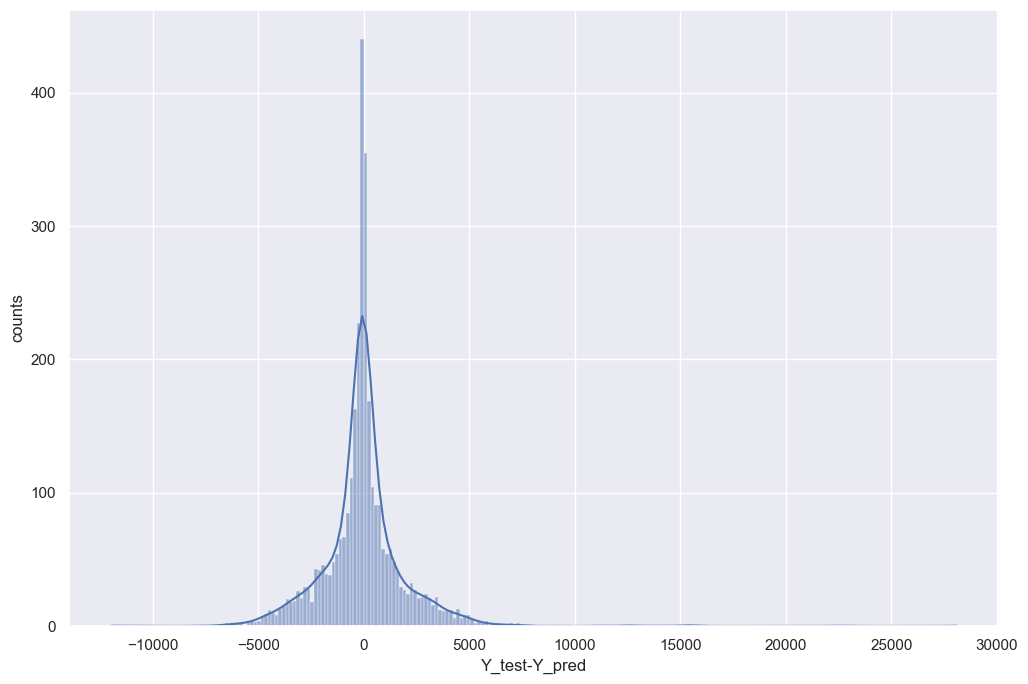

In [84]:
# Visualizing the distribution of difference in the actual value
plt.figure(figsize=(12,8))
sns.histplot(y_test-y_pred,kde=True)
plt.xlabel("Y_test-Y_pred")
plt.ylabel("counts")

In [85]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",np.sqrt(mse))
print("R2 score",r2score)

Mean Absolute Error: 1207.1052981584892
Mean Squared Error 4001592.1430934877
Root Mean Squared Error 2000.3979961731334
R2 score 0.8146550047220098


## Creating model using descision tree regressor

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [87]:
dtr = DecisionTreeRegressor()
cvs = cross_val_score(dtr,X,y,cv = 5)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
print("Predicted value of the test dataset\n",y_pred)

Predicted value of the test dataset
 [11263.5  5636.   3543.  ...  4565.   8586.   6628. ]


Text(0, 0.5, 'counts')

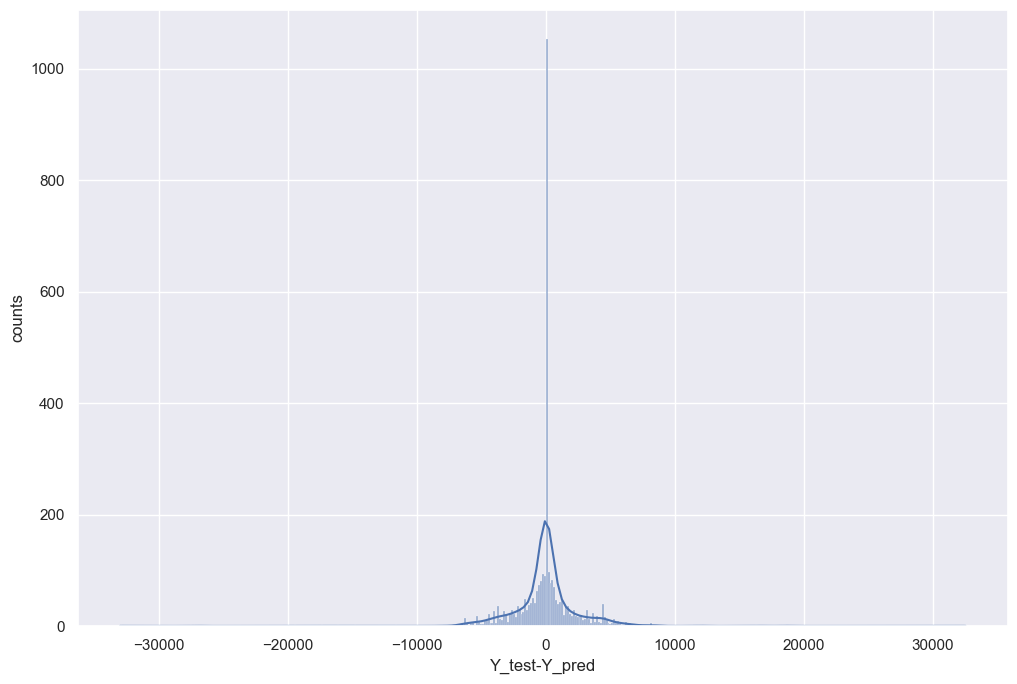

In [88]:
# Visualizing the distribution of difference in the actual value
plt.figure(figsize=(12,8))
sns.histplot(y_test-y_pred,kde=True)
plt.xlabel("Y_test-Y_pred")
plt.ylabel("counts")

In [89]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",np.sqrt(mse))
print("R2 score",r2score)

Mean Absolute Error: 1398.0852522100884
Mean Squared Error 6811097.04606119
Root Mean Squared Error 2609.8078561574584
R2 score 0.6845248829221696


### Conclusion
1. Three models had been trained, namely Multiple Linear Regression, Random Forest Regression and Decision Tree Regression respectively.
2. Among the three, the least RMSE score and highest R2_Score was seen for Random Forest Regression.
3. Therefore, the best model for prediction is Random Forest Regression.

## Save model to reuse it again

In [90]:
import pickle

# creating a file to score the model
file = open("fare_predict.pkl",'wb')

# Dumping model into file
pickle.dump(rfr, file)

In [91]:
file = open("fare_predict.pkl",'rb')
model = pickle.load(file)

In [92]:
y_pred = model.predict(processed_test.values)